# Problem Statement

For most financial institutions, such as banks and multi-finance companies, their main source of income is coming from their lending activities. By engaging in this activity, it means that lenders are exposed to the potential risk, where debtors stop repaying their loans, causing losses to the lenders. To mitigate this loss, lenders are expected to appropriately choose who are qualified for a loan, at what rate, and at what amount.  
In this question, you are tasked to help the troubled lenders with this problem by creating a model that can help them make their decision. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder


%matplotlib inline

from sklearn import set_config
set_config(print_changed_only=False)

import warnings
warnings.filterwarnings('ignore')

## Data Extraction

In [2]:
df = pd.read_csv('app_train.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)

In [3]:
df.shape

(61503, 23)

In [4]:
Lender=[]

for i in df.columns:
    Lender.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=Lender,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique','Unique Sample'
])

,Data Feature,Data Types,Null,Null Percentages,Unique,Unique Sample
0,LN_ID,int64,0,0.00,61503,"[158521, 101796]"
1,TARGET,int64,0,0.00,2,"[1, 0]"
2,CONTRACT_TYPE,object,0,0.00,2,"[Revolving loans, Cash loans]"
3,GENDER,object,0,0.00,2,"[F, M]"
4,NUM_CHILDREN,int64,0,0.00,10,"[1, 3]"
5,INCOME,float64,0,0.00,861,"[169137.0, 184203.0]"
6,APPROVED_CREDIT,float64,0,0.00,3562,"[528637.5, 522000.0]"
7,ANNUITY,float64,1,0.00,9374,"[50791.5, 47574.0]"
8,PRICE,float64,62,0.10,541,"[2196000.0, 268420.5]"
9,INCOME_TYPE,object,0,0.00,7,"[Pensioner, Unemployed]"


## Mapping Correlation Map

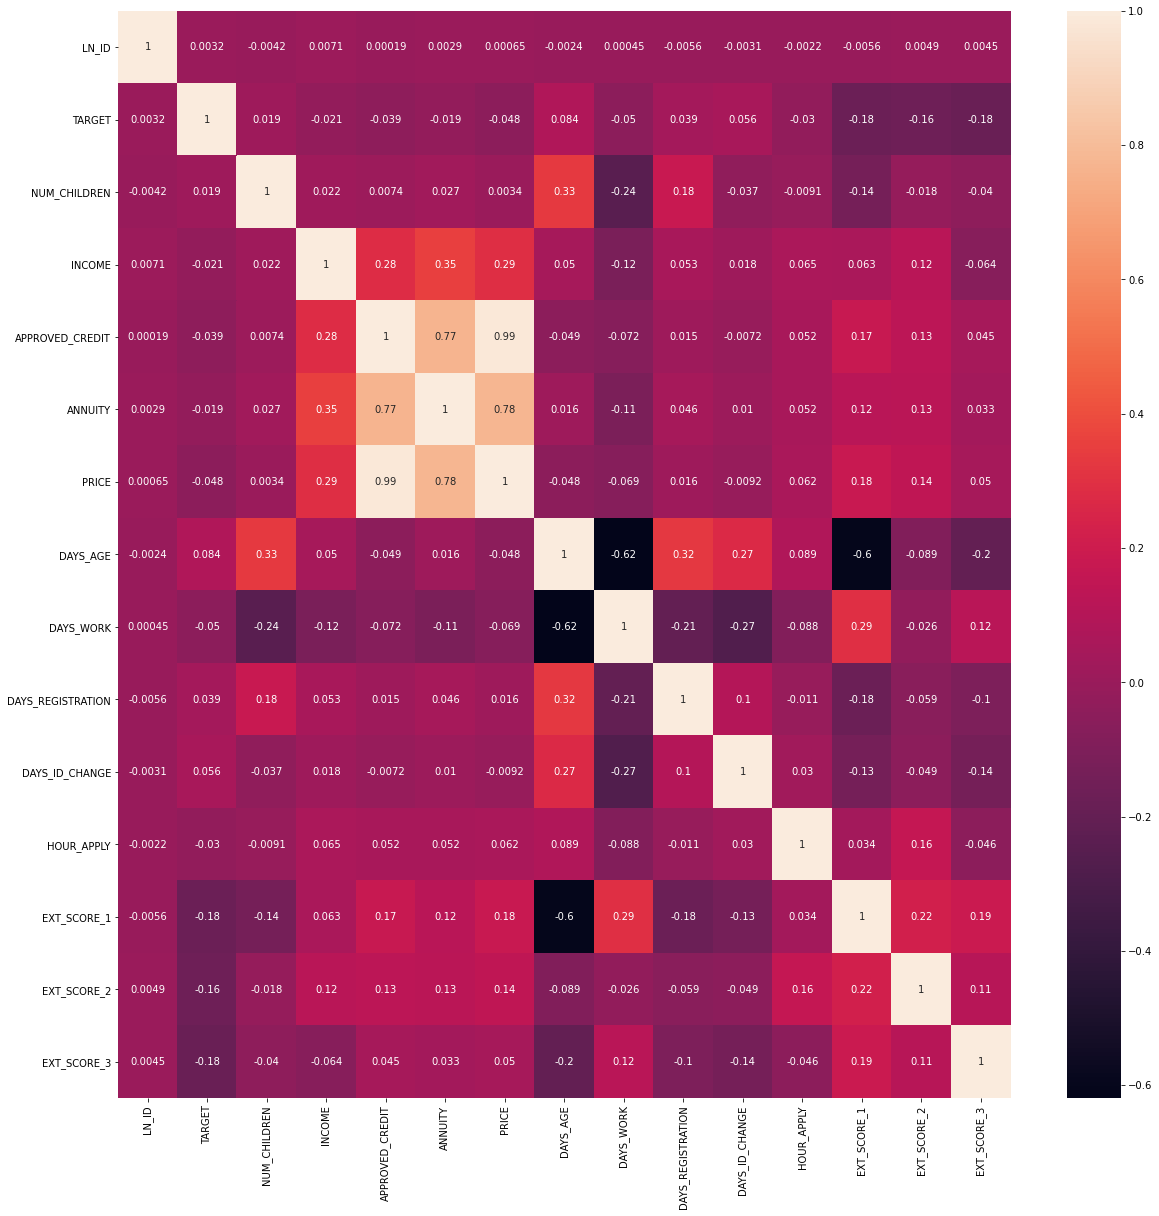

In [5]:
df.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

plt.show()

### Converting all character in columns into lower case

In [6]:
df.columns = [i.lower() for i in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61503 entries, 0 to 61502
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ln_id              61503 non-null  int64  
 1   target             61503 non-null  int64  
 2   contract_type      61503 non-null  object 
 3   gender             61503 non-null  object 
 4   num_children       61503 non-null  int64  
 5   income             61503 non-null  float64
 6   approved_credit    61503 non-null  float64
 7   annuity            61502 non-null  float64
 8   price              61441 non-null  float64
 9   income_type        61503 non-null  object 
 10  education          61503 non-null  object 
 11  family_status      61503 non-null  object 
 12  housing_type       61503 non-null  object 
 13  days_age           61503 non-null  int64  
 14  days_work          61503 non-null  int64  
 15  days_registration  61503 non-null  float64
 16  days_id_change     615

## Label Encoding all object data type

In [7]:
le = LabelEncoder()

cat_cols = [i for i in df.columns if df[i].dtype == 'object']

for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    df[col_name_encoded] = le.fit_transform(df[col_name])
    df = df.drop(columns=[col_name])
    
df.head()

,ln_id,target,num_children,income,approved_credit,annuity,price,days_age,days_work,days_registration,...,ext_score_2,ext_score_3,contract_type_encoded,gender_encoded,income_type_encoded,education_encoded,family_status_encoded,housing_type_encoded,weekdays_apply_encoded,organization_type_encoded
0,333538,0,1,67500.0,202500.0,10125.0,202500.0,-11539,-921,-119.0,...,0.608276,NaN,1,0,6,4,1,5,5,5
1,406644,0,1,202500.0,976711.5,49869.0,873000.0,-15743,-4482,-1797.0,...,0.684298,NaN,0,0,1,4,1,1,5,34
2,259130,0,0,180000.0,407520.0,25060.5,360000.0,-20775,365243,-8737.0,...,0.580687,0.749022,0,0,2,4,1,1,4,33
3,411997,0,0,225000.0,808650.0,26086.5,675000.0,-20659,-10455,-4998.0,...,0.623740,0.710674,0,1,3,1,1,1,6,8
4,241559,0,0,135000.0,180000.0,9000.0,180000.0,-9013,-1190,-3524.0,...,0.492994,0.085595,1,1,1,4,3,1,3,7


In [8]:
Lender=[]

for i in df.columns:
    Lender.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i].isna().sum())/len(df))*100).round(2),
        df[i].nunique()
    ])
    
pd.DataFrame(data=Lender,columns=[
    'Data Feature', 'Data Types', 'Null','Null Percentages','Unique'])

,Data Feature,Data Types,Null,Null Percentages,Unique
0,ln_id,int64,0,0.00,61503
1,target,int64,0,0.00,2
2,num_children,int64,0,0.00,10
3,income,float64,0,0.00,861
4,approved_credit,float64,0,0.00,3562
5,annuity,float64,1,0.00,9374
6,price,float64,62,0.10,541
7,days_age,int64,0,0.00,16257
8,days_work,int64,0,0.00,8524
9,days_registration,float64,0,0.00,13153


In [9]:
df.isna().sum()

ln_id                            0
target                           0
num_children                     0
income                           0
approved_credit                  0
annuity                          1
price                           62
days_age                         0
days_work                        0
days_registration                0
days_id_change                   0
hour_apply                       0
ext_score_1                  34845
ext_score_2                    134
ext_score_3                  12239
contract_type_encoded            0
gender_encoded                   0
income_type_encoded              0
education_encoded                0
family_status_encoded            0
housing_type_encoded             0
weekdays_apply_encoded           0
organization_type_encoded        0
dtype: int64

In [10]:
df.dropna(inplace=True)

df.isna().sum()

ln_id                        0
target                       0
num_children                 0
income                       0
approved_credit              0
annuity                      0
price                        0
days_age                     0
days_work                    0
days_registration            0
days_id_change               0
hour_apply                   0
ext_score_1                  0
ext_score_2                  0
ext_score_3                  0
contract_type_encoded        0
gender_encoded               0
income_type_encoded          0
education_encoded            0
family_status_encoded        0
housing_type_encoded         0
weekdays_apply_encoded       0
organization_type_encoded    0
dtype: int64

## Checking target columns

In [11]:
df["target"].value_counts()

pd.crosstab(index=df['target'],columns='count',normalize=True)*100

col_0,count
target,
0,92.716508
1,7.283492


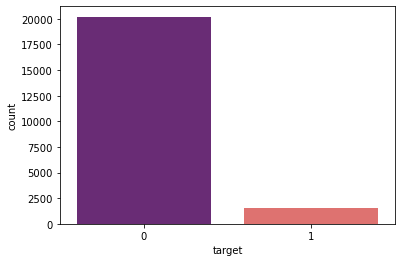

In [12]:
ax = sns.countplot(x=df['target'], data=df, palette='magma')

plt.show()

##### The target column is imbalanced, so it is needed to be handled properly. In this case, random oversampling will be applied

# Target Engineering

## Splitting Data

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,roc_auc_score, recall_score, precision_score, accuracy_score

from sklearn.utils import resample

In [14]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size = .8, random_state=42)

In [15]:
X_train.shape

(17431, 22)

In [16]:
X_test.shape

(4358, 22)

In [17]:
df_train = pd.concat([X_train, y_train], axis=1)

df_train['target'].value_counts()

0    16161
1     1270
Name: target, dtype: int64

In [18]:
non_troubledlender = df_train[df_train['target'] == 0] ##  Majority class
troubledlender = df_train[df_train['target'] == 1] ##  Minority class

## Handling Imbalanced Data

### Random Oversampling 

In [19]:
troubledlender_oversample = resample(troubledlender, ## Minority
                           replace=True,
                           n_samples = len(non_troubledlender), ## Sum of Majority class
                           random_state = 42)

df_OverSampled = pd.concat([non_troubledlender, troubledlender_oversample])

df_OverSampled['target'].value_counts()

1    16161
0    16161
Name: target, dtype: int64

In [20]:
X_train_OverSampled = df_OverSampled.drop(columns=['target'])
y_train_OverSampled = df_OverSampled['target']

# MODELING

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
# set up the experiment

from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold


models = Pipeline([
    ('clf', None), 
])

search = GridSearchCV(
    models, 
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), 
    return_train_score=False, 
    scoring=['accuracy','precision', 'recall', 'f1'],
    refit='recall',
    param_grid={
        'clf': [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(max_iter=10000)]        
})

## Fitting and experimenting with different models


In [23]:
import time

start = time.time()
search.fit(X_train_OverSampled, y_train_OverSampled)
search

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None, steps=[('clf', None)],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'clf': [KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=2,
                                                      weights='uniform'),
                                 RandomF...
                                 LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                            

In [38]:
print('Best model:', search.best_params_)
model_comparison = pd.DataFrame(search.cv_results_)
model_comparison

Best model: {'clf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,...,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.359626,0.054540,0.356650,0.055033,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'clf': KNeighborsClassifier(algorithm='auto',...",0.890504,0.891432,0.885520,0.886757,...,0.898277,0.899527,0.906338,0.897664,0.903046,0.894547,0.896781,0.899628,0.003312,2
1,6.000641,0.564574,0.104887,0.014642,"RandomForestClassifier(bootstrap=True, ccp_alp...","{'clf': RandomForestClassifier(bootstrap=True,...",0.998453,0.998763,0.999381,0.998762,...,0.998764,0.999073,0.998764,0.998147,0.998147,0.998147,0.996915,0.998456,0.000647,1
2,0.445612,0.069083,0.009792,0.001325,"LogisticRegression(C=1.0, class_weight=None, d...","{'clf': LogisticRegression(C=1.0, class_weight...",0.568512,0.573770,0.580446,0.591894,...,0.592272,0.587011,0.572059,0.584558,0.569532,0.579194,0.588672,0.578617,0.010186,3


# Model Comparison

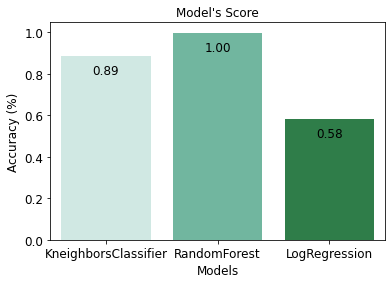

In [41]:
model_comparison['model'] = ['KneighborsClassifier', 'RandomForest', 'LogRegression']
ax = sns.barplot('model', 'mean_test_accuracy', data=model_comparison, capsize=.05, palette='BuGn', ci=None)
ax.set_xlabel("Models",fontsize=12)
ax.set_ylabel("Accuracy (%)",fontsize=12)
ax.tick_params(labelsize=12)
ax.axes.set_title("Model's Score", fontsize=12)

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=12, color='black', xytext=(0, -15),
    textcoords='offset points')

# Export Model

In [25]:
import joblib

joblib.dump(search,'model')

['model']

# Ranking Applicant

In [26]:
app_test = pd.read_csv('app_test.csv')

app_test.columns = [i.lower() for i in app_test.columns]
app_test = app_test.drop(['unnamed: 0'], axis=1)
app_test = app_test.dropna()
print(app_test.shape)

# transform categorical columns using label encoder
for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    
    le_loaded=joblib.load('model', mmap_mode=None)  
    
    
# load model
loaded_model = joblib.load(open('model', 'rb'))

(5286, 23)


In [27]:
test = LabelEncoder()

cat_cols = [i for i in app_test.columns if app_test[i].dtype == 'object']

for col_name in cat_cols:
    col_name_encoded = col_name + '_encoded'
    app_test[col_name_encoded] = test.fit_transform(app_test[col_name])
    app_test = app_test.drop(columns=[col_name])
    
df.head()

X_test = app_test.drop('target', axis=1)
y_test = app_test['target']

prediction_prob = loaded_model.predict_proba(X_test)

In [34]:
Ranking = pd.DataFrame()

Ranking['ln_id'] = app_test['ln_id']
Ranking['Probability'] = [i[1] for i in prediction_prob]

Ranking = Ranking.sort_values('Probability').reset_index(drop=True)
print(Ranking)

       ln_id  Probability
0     180205         0.00
1     415912         0.00
2     238737         0.00
3     174398         0.00
4     122540         0.00
...      ...          ...
5281  164492         0.53
5282  217305         0.55
5283  413331         0.57
5284  219420         0.61
5285  393398         0.62

[5286 rows x 2 columns]


## ROC /AUC Score

No Skill Model: ROC AUC = 0.500
Trained Model: ROC AUC = 0.506


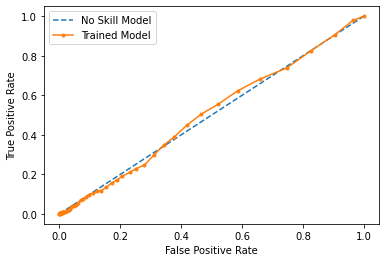

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc



# no skill model
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, Ranking['Probability'])
# summarize scores
print('No Skill Model: ROC AUC = %.3f' % (ns_auc))
print('Trained Model: ROC AUC = %.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, Ranking['Probability'])



# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill Model')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Trained Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend and plot
plt.legend()
plt.show()